<a href="https://colab.research.google.com/github/Joelzr01/Preprocesamiento-de-Datos/blob/main/ExploratoryDataAnalysisTiTanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción al Análisis Exploratorio de Datos




En este tutorial cubriremos:
*  Análisis descriptivo
*  Problemas en los datos y limpieza
*  Interrelaciones entre multiples features
*  Identificación de features correlacionados

Para este taller haremos uso del dataset **Titanic**, el cual fue obtenido de Kaggle y sirve como buen inicio para fines académicos en ciencia de datos.

También haremos uso de un dataset de con datos de Titanic.

link1: https://drive.google.com/drive/folders/1Lm5g43ESgDUmSChkR4xA5eWSIBu5UnL2?usp=sharing

Link del DATASET: https://drive.google.com/file/d/1yro7mYSiqxWaSHbPqtqdkngO1lf0XQVO/view?usp=sharing

Colab Chrome Extension: https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo








## Data Dictionary

* Survival: 1 si sobrevivió y 0 si no
* pclass: Ticket class. 1 = 1st; 2 = 2nd; 3 = 3rd
* sex: género
* SibSp: # hermanos / cónyuges a bordo del Titanic
* Parch: # de padres / hijos a bordo del Titanic
* Fare: Tarifa
* Cabin: Cabina
* Embarked: Puerto de embarque. C = Cherbourg; Q = Queenstown; S = Southampton


In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# # loading data
# from google.colab import files
# uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IA/train.csv')

In [ ]:
data = pd.read_csv('https://drive.google.com/file/d/1SmjEQHoCLSINjmuXmPQNCJ75ua077zhW/view?usp=sharing')


In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
# import io
# data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

#data = pd.read_csv('path')

In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
data.shape

(891, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# checking for total null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Notemos que las variables Age, Cabin y Embarked tienen valores perdidos**

### Análisis descriptivo

In [ ]:
# data['Survived'].value_counts() # datos categoricos
data.Survived.value_counts() # datos categoricos

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

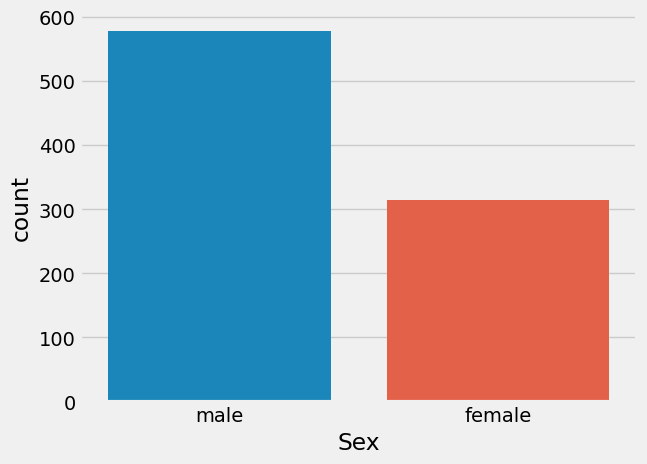

In [ ]:
sns.countplot(x='Sex', data = data)
plt.show()

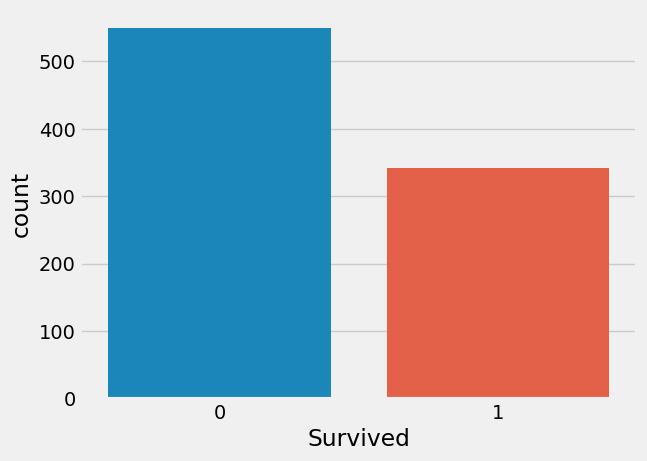

In [ ]:
sns.countplot(x='Survived', data = data)
plt.show()

<Axes: ylabel='Survived'>

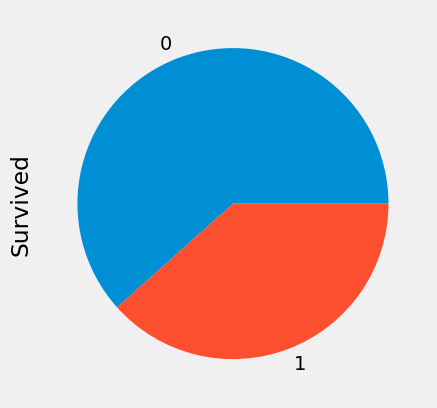

In [ ]:
data.Survived.value_counts().plot.pie()

<Axes: ylabel='Sex'>

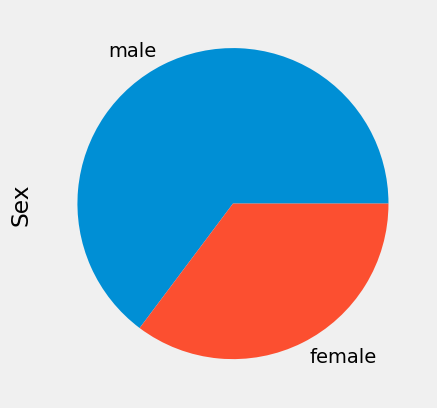

In [ ]:
data.Sex.value_counts().plot.pie()

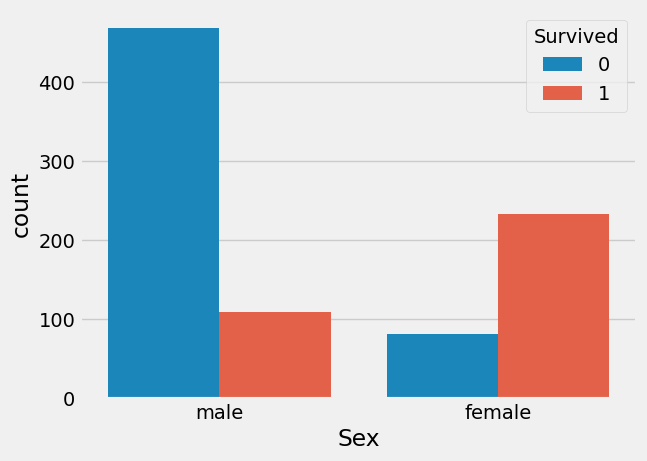

In [ ]:
# Quines sobreviven mas? los hombres o las mujeres?
sns.countplot(x='Sex', hue='Survived', data = data)
plt.show()

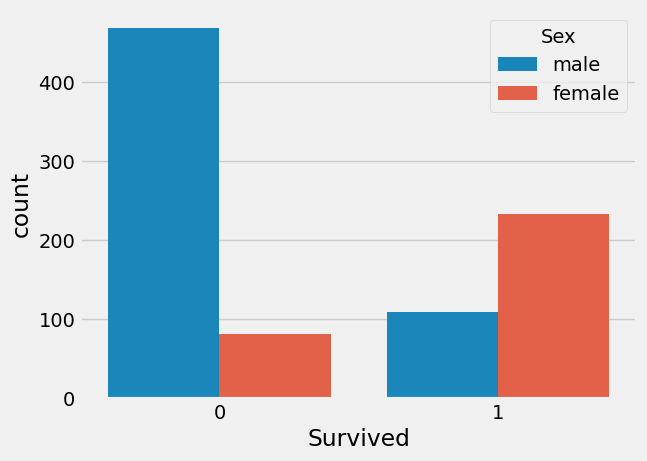

In [ ]:
# Quines sobreviven mas? los hombres o las mujeres?
sns.countplot(x='Survived', hue='Sex', data = data)
plt.show()

In [ ]:
data.Pclass
data['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [ ]:
# quines sobreviven mas? los de primera clase o lo de ultima clase?
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


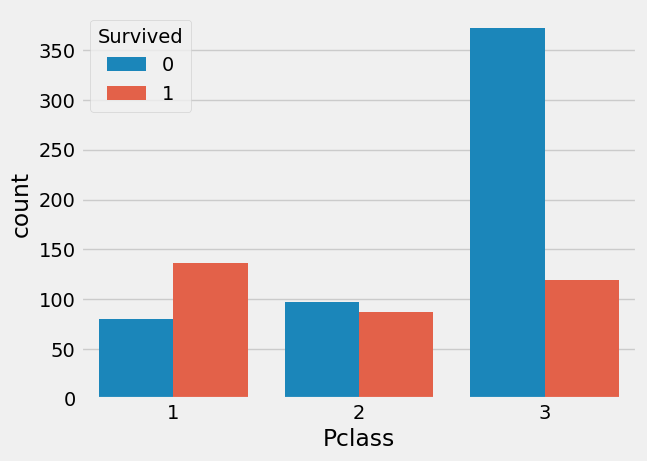

In [ ]:

sns.countplot(x='Pclass', hue = 'Survived', data = data)
plt.show()

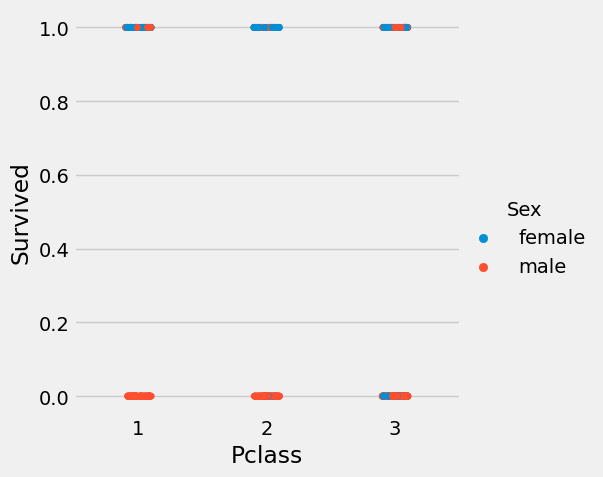

In [ ]:
# podemos combinar estos dos hallazgos?
sns.catplot(x='Pclass', y='Survived', hue = 'Sex', data = data)
plt.show()

In [ ]:
# la edad importó para haber sobrevivido?
print('El pasajero más viejo tenía:', data.Age.max(), 'años.')
print('El pasajero más joven tenía:', data.Age.min(), 'años.')
print('La edad promedio de los pasajeros fue:', round(data.Age.mean()), 'años.')

El pasajero más viejo tenía: 80.0 años.
El pasajero más joven tenía: 0.42 años.
La edad promedio de los pasajeros fue: 30 años.


In [ ]:
data[data.Age<=12].PassengerId.count()

69

<Axes: xlabel='Pclass', ylabel='Sex'>

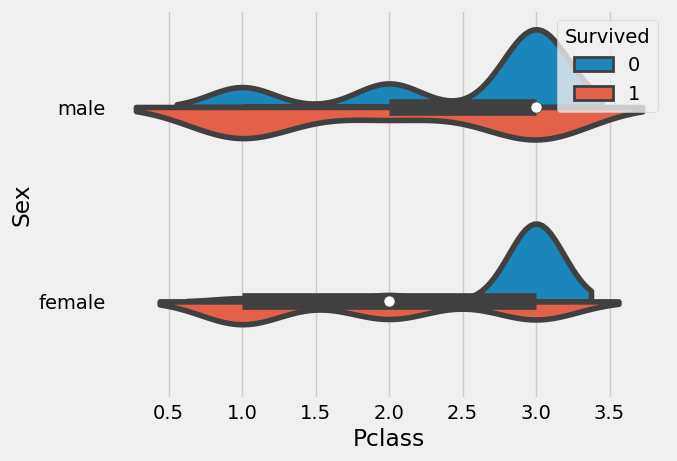

In [ ]:
sns.violinplot(x='Pclass', y='Sex', hue = 'Survived', data = data, split = True)

<Axes: xlabel='Pclass', ylabel='Age'>

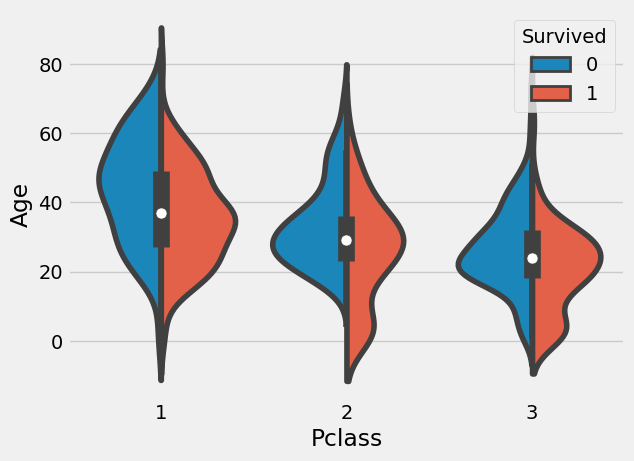

In [ ]:
sns.violinplot(x='Pclass', y='Age', hue = 'Survived', data = data, split = True)

In [ ]:
data[data.Pclass==3].Age.max()

74.0

<Axes: xlabel='Sex', ylabel='Age'>

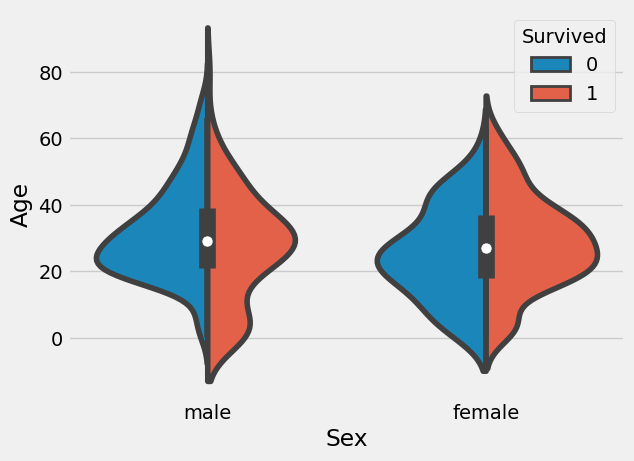

In [ ]:
sns.violinplot(x='Sex', y='Age', hue = 'Survived', data = data, split = True)

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# podemos extraer features a partir de los nombres?
data['Inicial'] = 0 #new column
for i in data:
  data['Inicial'] = data.Name.str.extract('([A-Za-z]+)\.')  # [A-Za-z] es una expresion regular (RegEx). extrae strings esten entre A y Z seguido de un punto.

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Inicial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
data.Inicial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
data.Inicial.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Inicial, dtype: int64

In [ ]:
# chequeamos los titulos de las personas de acuerdo a su sexo
pd.crosstab(data.Inicial, data.Sex).T.style.background_gradient(cmap='summer_r')

Inicial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
data['Inicial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
data['Inicial'].value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Inicial, dtype: int64

In [ ]:
pd.crosstab(data.Inicial, data.Sex).T.style.background_gradient(cmap='summer_r')

Inicial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Inicial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
# la edad promedio dentro de cada uno de los titulos?
data.groupby('Inicial').Age.mean()

Inicial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
# ahora podemos reemplazar la media en los valores perdidos

data.loc[(data.Age.isnull()) & (data.Inicial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Inicial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Inicial=='Master'),'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Inicial=='Miss'),'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Inicial=='Other'),'Age'] = 46

In [ ]:
# verificando que se hayan hecho los reemplazos
data.Age.isnull().any()

False

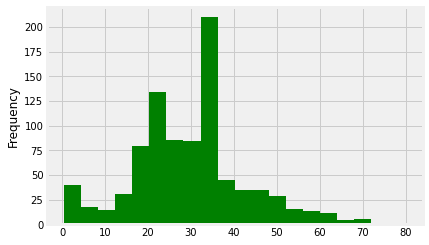

In [ ]:
data.Age.plot.hist(bins = 20, color = 'green')

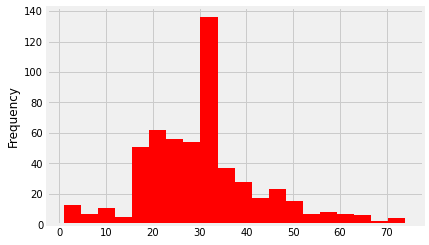

In [ ]:
data[data['Survived'] == 0].Age.plot.hist(bins = 20, color = 'red')

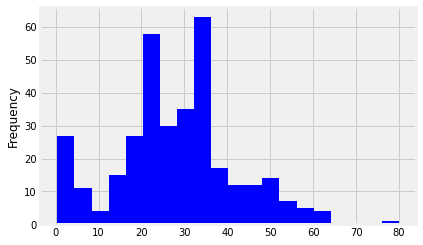

In [ ]:
data[data['Survived'] == 1].Age.plot.hist(bins = 20, color = 'blue')

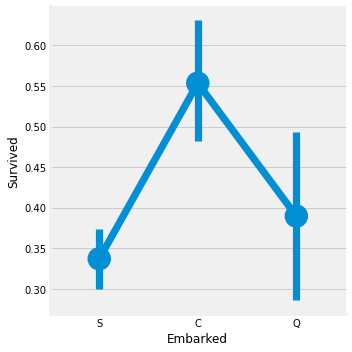

In [ ]:
# la probabilidad de sobrevivir depende de qué puerto se embarcó?
sns.factorplot('Embarked', 'Survived', data = data)
plt.show()

In [ ]:
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

<Axes: xlabel='Embarked', ylabel='count'>

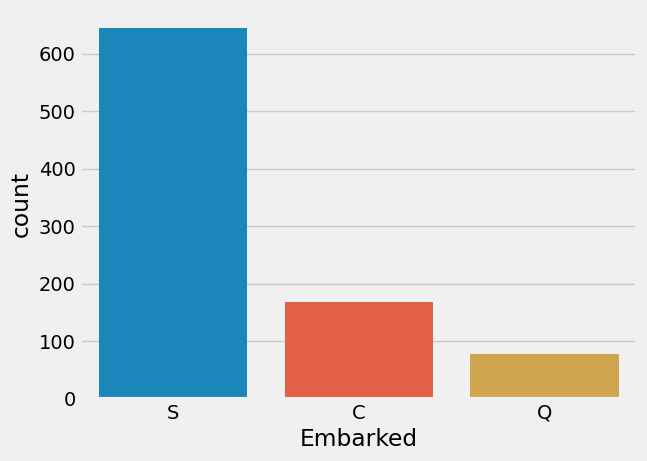

In [ ]:
sns.countplot(x='Embarked',data=data) # cantidad de pasajeros segun el puerto de embarque

<Axes: xlabel='Embarked', ylabel='count'>

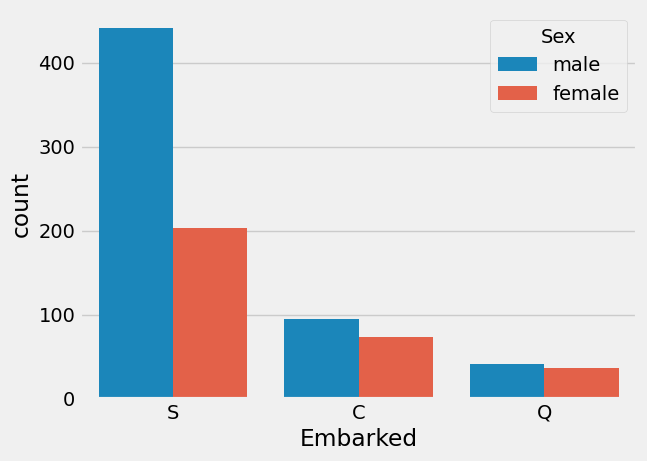

In [ ]:
sns.countplot(x='Embarked',hue='Sex',data=data) # cantidad de pasajeros segun el puerto de embarque y por sexo

<Axes: xlabel='Embarked', ylabel='count'>

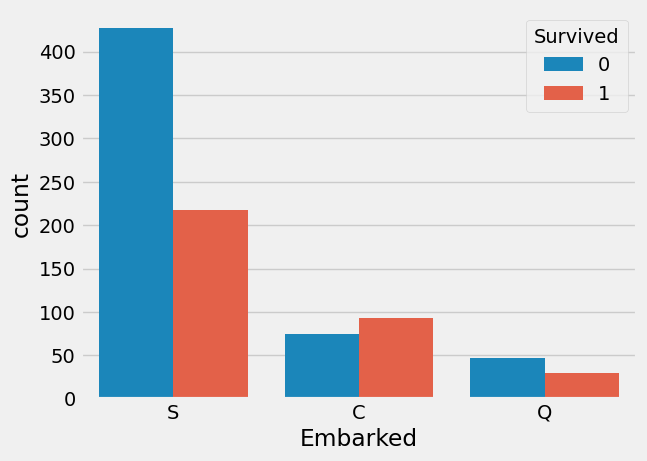

In [ ]:
sns.countplot(x='Embarked',hue='Survived',data=data) # cantidad de pasajeros segun el puerto de embarque y por indicador de supervivencia

<Axes: xlabel='Embarked', ylabel='count'>

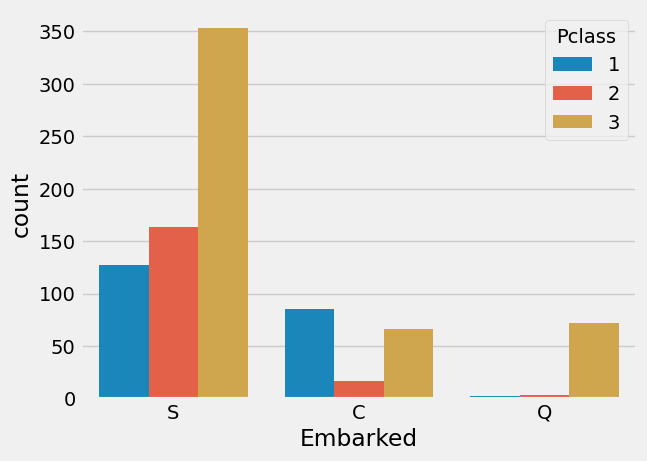

In [ ]:
sns.countplot(x='Embarked',hue='Pclass',data=data) # cantidad de pasajeros segun el puerto de embarque y por clase

In [ ]:
data[(data.Embarked=='S') & (data.Pclass==3)].Sex.value_counts()

male      265
female     88
Name: Sex, dtype: int64

In [ ]:
data[(data.Embarked=='S') & (data.Pclass==3)&(data.Survived==0)].Sex.value_counts()

male      231
female     55
Name: Sex, dtype: int64

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Inicial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Inicial          0
dtype: int64

In [ ]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)

In [ ]:
data[(data.Embarked=='Q') & (data.Pclass==3)&(data.Survived==0)].Sex.value_counts()

male      36
female     9
Name: Sex, dtype: int64

In [ ]:
# el puerto como mayor embarque es el S, entonces reemplazamos los missing values con esta categoria
data['Embarked'].fillna('S', inplace = True)

In [ ]:
data.Embarked.isnull().any() # comprobando si el reemplazo es correcto

False

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Inicial          0
dtype: int64

In [ ]:
# que podemos decir acerca de los precios de los boletos?
print('El tarifa máxima fue:', data['Fare'].max())
print('La tarifa mínima fue:', data['Fare'].min())
print('La tarifa promedio fue:', data['Fare'].mean())

El tarifa máxima fue: 512.3292
La tarifa mínima fue: 0.0
La tarifa promedio fue: 32.204207968574636


In [ ]:
data[data['Fare']==0.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Inicial
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,33.0,0,0,239853,0.0,NaN,S,Mr
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,33.0,0,0,239853,0.0,NaN,S,Mr
466,467,0,2,"Campbell, Mr. William",male,33.0,0,0,239853,0.0,NaN,S,Mr
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,33.0,0,0,239854,0.0,NaN,S,Mr
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr
633,634,0,1,"Parr, Mr. William Henry Marsh",male,33.0,0,0,112052,0.0,NaN,S,Mr


<Axes: xlabel='Fare', ylabel='Density'>

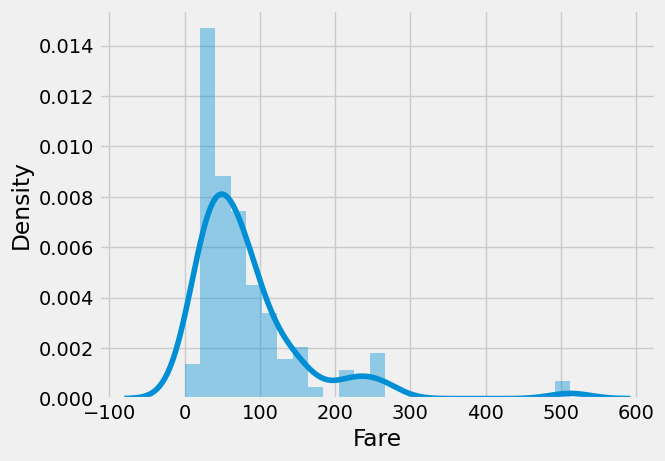

In [ ]:
sns.distplot(data[data['Pclass'] == 1].Fare) # para la clase 1

<Axes: xlabel='Fare', ylabel='Density'>

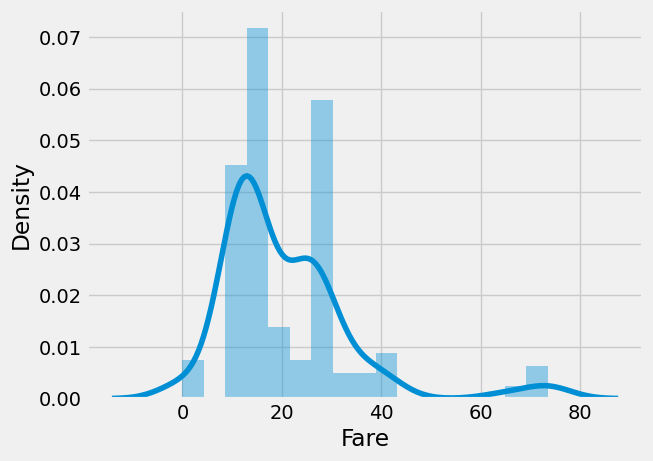

In [ ]:
sns.distplot(data[data['Pclass'] == 2].Fare) # para la clase 2

<Axes: xlabel='Fare', ylabel='Density'>

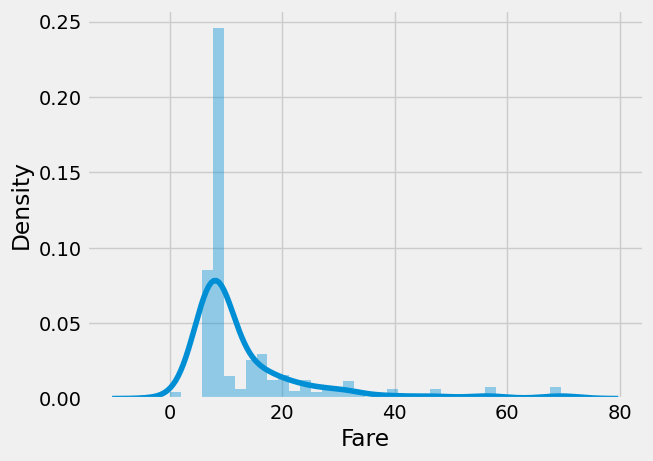

In [ ]:
sns.distplot(data[data['Pclass'] == 3].Fare) # para la clase 3

In [ ]:
data.drop(['Cabin'], axis=1, inplace=True)
data.drop(['PassengerId'], axis=1, inplace=True)

In [ ]:
data.drop(['PassengerId'], axis=1, inplace=True)

In [ ]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Inicial     0
dtype: int64

### Key Takeaways

* Sex: La probabilidad de supervivencia es más alta en mujeres que en hombres
* Pclass: Los pasajeros de la primera clase tienen más chances de sobrevivir a comparación de los de la última clase. La mujeres de la primera clase tienen altas probabilidades de sobrevivir.
* Age: Pasajeros en edad de 5 a 10 años tienen altas chances de sobrevivir. Pasajeros entre 15 y 35 años tienes altas probabilidades de morir.
* Embarked: Las personas que embarcaron en el puerto C tienen altas chances de sobrevivir.


## Identificación de features correlacionados (Multicolinealidad)

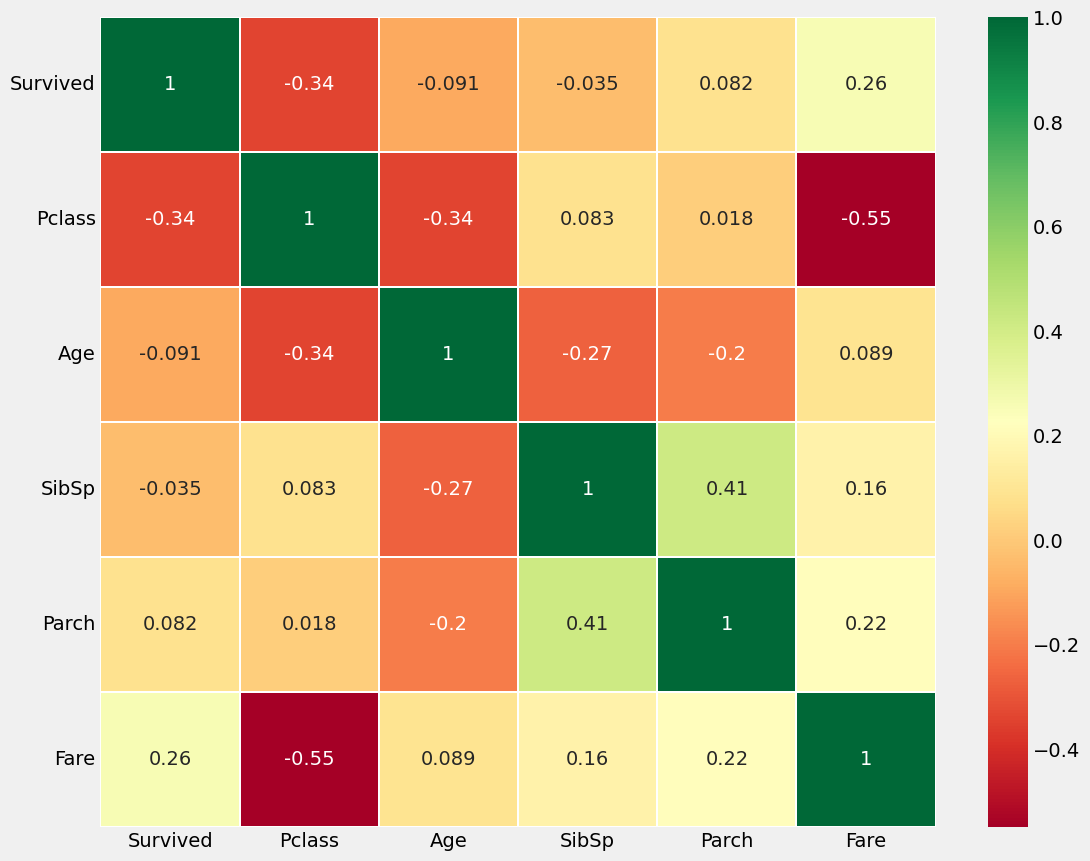

In [ ]:
sns.heatmap(data.corr(), annot= True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()